In [79]:
import pandas as pd
from scipy.stats import *

from datetime import datetime

import numpy as np
from scipy import stats
# matplotlib 패키지
import matplotlib.pyplot as plt
%matplotlib inline
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정
import warnings 
warnings.filterwarnings('ignore')

In [80]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [81]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


## 데이터 불러오기 

In [82]:
busan_av=pd.read_csv('./data/2021_03~06부산.csv', thousands=',',encoding='UTF-8')
busan_bv = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_av2 = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')
busan_2020=pd.read_csv('./data/busan_movie_2020.csv', thousands=',',encoding='UTF-8')

In [83]:
busan_av=busan_av.drop(['Unnamed: 0'],axis=1)
busan_bv=busan_bv.drop(['Unnamed: 0'],axis=1)
busan_av2=busan_av2.drop(['Unnamed: 0'],axis=1)
busan_2020=busan_2020.drop(['Unnamed: 0'],axis=1)

In [84]:
# 백신전인 2020.08~2020 df 합치기
busan_bv=pd.concat([busan_2020,busan_bv]).reset_index(drop=True)

In [85]:
busan_av=busan_av.drop(0)

In [86]:
# busan_bv=busan_bv.drop(['Unnamed: 0'],axis=1)
busan_bv
busan_av

,지역,매출액,관객수,주
0,부산시,1114537230,123943,2020-08-16
1,부산시,618924290,71890,2020-08-23
2,부산시,467448880,53630,2020-08-30
3,부산시,401747560,45878,2020-09-06
4,부산시,350543860,40374,2020-09-13
5,부산시,369444420,43470,2020-09-20
6,부산시,1270147320,137503,2020-09-27
7,부산시,677889690,74197,2020-10-04
8,부산시,425792690,46497,2020-10-11
9,부산시,517480560,57976,2020-10-18


,지역,매출액,관객수,주
1,부산시,513370590,56521,2021-03-12
2,부산시,438756130,48866,2021-03-19
3,부산시,425217210,46215,2021-03-26
4,부산시,522446130,60290,2021-04-02
5,부산시,395182360,43284,2021-04-09
6,부산시,314571750,35267,2021-04-16
7,부산시,390483590,42905,2021-04-23
8,부산시,445720640,51929,2021-04-30
9,부산시,656383270,73087,2021-05-07
10,부산시,321925980,35956,2021-05-14


In [87]:
busan_bv_total= (busan_bv['매출액'])
busan_av_total=(busan_av['매출액'])

In [88]:
busan_bv.describe()
busan_av.describe()
avg_2019=2929067941

,매출액,관객수
count,3.000000e+01,30.000000
mean,4.702705e+08,53164.633333
std,2.692797e+08,29252.716136
min,9.032757e+07,10890.000000
25%,2.851953e+08,32964.000000
50%,4.641548e+08,52624.500000
75%,6.005487e+08,68060.000000
max,1.270147e+09,137503.000000


,매출액,관객수
count,1.600000e+01,16.000000
mean,5.612755e+08,61401.187500
std,1.816668e+08,18858.237879
min,3.145718e+08,35267.000000
25%,4.177085e+08,45482.250000
50%,5.179084e+08,58405.500000
75%,7.017426e+08,75624.250000
max,8.582801e+08,90495.000000


In [89]:
5.584576e+08-1.762814e+08

382176200.0

In [90]:
tmp = []
for i in range(14):
    tmp.append(np.random.randint(382176200,739550200,dtype='int64'))
    
# 결측치 처리 더 알아보기! ! ! ! ! !*********

In [91]:
# 접종이후의 데이터가 접종 전보다 부족해서 결측치를 평균값으로 대체
busan_av_total = np.append(busan_av_total,tmp )
busan_av_total

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 513079888, 556940186,
       693630055, 564636078, 618256271, 631385806, 613481932, 732031298,
       591628077, 600066687, 489993048, 406170111, 640838551, 453886678],
      dtype=int64)

In [92]:
np.array(busan_bv_total)
busan_av_total

array([1114537230,  618924290,  467448880,  401747560,  350543860,
        369444420, 1270147320,  677889690,  425792690,  517480560,
        610113200,  714585170,  709390750,  615709150,  418791390,
        231147290,  179772960,  137530150,  263412500,  162778220,
        133154520,   90327570,  139130900,  381529810,  467990770,
        553603860,  571855100,  460860670,  539104860,  513370590],
      dtype=int64)

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 513079888, 556940186,
       693630055, 564636078, 618256271, 631385806, 613481932, 732031298,
       591628077, 600066687, 489993048, 406170111, 640838551, 453886678],
      dtype=int64)

## t검정

In [93]:
kstest(busan_av_total-busan_bv_total, 'norm')

KstestResult(statistic=0.6666666666666667, pvalue=1.1672619528040868e-13)

In [94]:
ttest_rel(busan_av_total, busan_bv_total)

# 귀무가설 : 코로나 접종전과 이후의 매출액 차이가 없다

# pvalue가 0에 가까우면 귀무가설은 기각

Ttest_relResult(statistic=1.664607380207984, pvalue=0.10676070207802316)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0172bcee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0172bc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0172bcb50>,
 'medians': [<matplotlib.lines.Line2D at 0x1d0172c7880>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d0172c7160>,
 'means': []}

([<matplotlib.axis.XTick at 0x1d01769a730>,
 [Text(1, 0, '백신접종이전'), Text(2, 0, '백신접종이후')])

Text(0, 0.5, '2019 평균 대비 매출액%')

<function matplotlib.pyplot.show(close=None, block=None)>

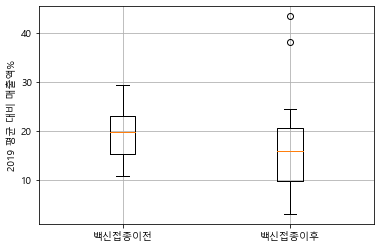

In [95]:
# 상자 그래프로 확인
plt.boxplot([
            busan_av_total/2929067941*100,
            busan_bv_total/2929067941*100
                              ])
plt.xticks([1,2],['백신접종이전','백신접종이후'])
plt.ylabel('2019 평균 대비 매출액%')  # [1,2]는 나누기정도
plt.grid()
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.show

In [96]:
# 산점도그래프
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

<Figure size 720x432 with 0 Axes>

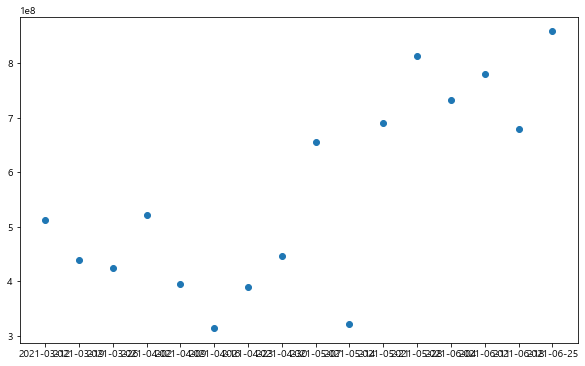

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(busan_av['주'],busan_av['매출액'])

## 추가 시각화 (산점도, 회귀선)

In [98]:
busan_av['주차'] = [i for i in range(31,47)]
busan_bv['주차'] = [i for i in range(1,31)]

In [99]:
busan_bv
busan_av

,지역,매출액,관객수,주,주차
0,부산시,1114537230,123943,2020-08-16,1
1,부산시,618924290,71890,2020-08-23,2
2,부산시,467448880,53630,2020-08-30,3
3,부산시,401747560,45878,2020-09-06,4
4,부산시,350543860,40374,2020-09-13,5
5,부산시,369444420,43470,2020-09-20,6
6,부산시,1270147320,137503,2020-09-27,7
7,부산시,677889690,74197,2020-10-04,8
8,부산시,425792690,46497,2020-10-11,9
9,부산시,517480560,57976,2020-10-18,10


,지역,매출액,관객수,주,주차
1,부산시,513370590,56521,2021-03-12,31
2,부산시,438756130,48866,2021-03-19,32
3,부산시,425217210,46215,2021-03-26,33
4,부산시,522446130,60290,2021-04-02,34
5,부산시,395182360,43284,2021-04-09,35
6,부산시,314571750,35267,2021-04-16,36
7,부산시,390483590,42905,2021-04-23,37
8,부산시,445720640,51929,2021-04-30,38
9,부산시,656383270,73087,2021-05-07,39
10,부산시,321925980,35956,2021-05-14,40


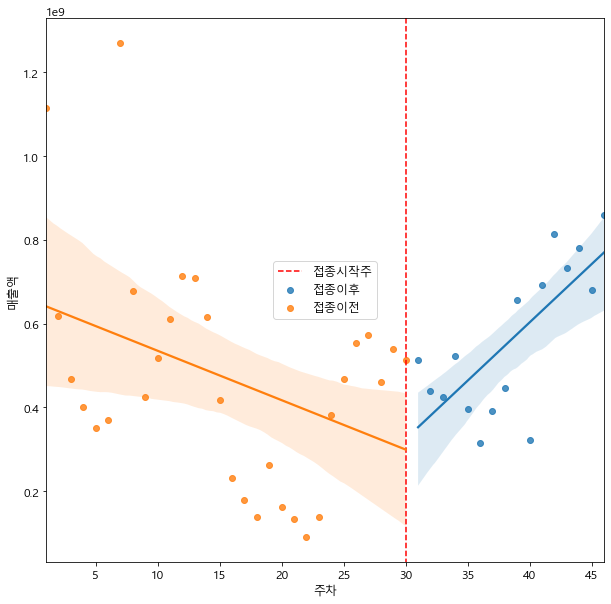

In [100]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
avr_2019=2929067941
#산점도 + 회귀직선 비교

fig = plt.figure(figsize = [10,10])
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
#ax = fig.add_subplot(111)
# plt.axhline(int(avr_2019),0.05, 0.95, color = 'red', linestyle = '--',label='2019주평균' )
plt.axvline(30,1, 0, color = 'red', linestyle = '--',label='접종시작주' )

ax = sns.regplot(x='주차',y='매출액',data=busan_av,label='접종이후')
ax = sns.regplot(x='주차',y='매출액',data=busan_bv,label='접종이전')
ax.legend(loc='center')

## 주간 접종자수-매출액 상관분석

In [101]:
fin_busan=pd.read_csv('data/부산주간백신정보.csv').drop("Unnamed: 0",axis=1)

In [102]:
fin_busan.drop('일자',axis=1)

,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,50988,0,10943,0
1,60664,62,9676,62
2,73571,245,12907,183
3,83895,2388,10324,2143
4,96082,4161,12187,1773
5,121702,4161,25620,0
6,174943,8592,53241,4431
7,223997,18249,49054,9657
8,231495,32353,7498,14104
9,233540,60033,2045,27680


In [103]:
# fin_df=pd.concat([busan_av,fin_busan],axis=1).drop('주차',axis=1)

In [110]:
pd.options.display.float_format = '{:.2f}'.format
fin_df = pd.concat([busan_av,fin_busan],axis=1).drop('주차',axis=1)

In [111]:
fin_df

,지역,매출액,관객수,주,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,NaN,nan,nan,NaT,20210318.00,50988.00,0.00,10943.00,0.00
1,부산시,513370590.00,56521.00,2021-03-12,20210325.00,60664.00,62.00,9676.00,62.00
2,부산시,438756130.00,48866.00,2021-03-19,20210401.00,73571.00,245.00,12907.00,183.00
3,부산시,425217210.00,46215.00,2021-03-26,20210408.00,83895.00,2388.00,10324.00,2143.00
4,부산시,522446130.00,60290.00,2021-04-02,20210415.00,96082.00,4161.00,12187.00,1773.00
5,부산시,395182360.00,43284.00,2021-04-09,20210422.00,121702.00,4161.00,25620.00,0.00
6,부산시,314571750.00,35267.00,2021-04-16,20210429.00,174943.00,8592.00,53241.00,4431.00
7,부산시,390483590.00,42905.00,2021-04-23,20210506.00,223997.00,18249.00,49054.00,9657.00
8,부산시,445720640.00,51929.00,2021-04-30,20210513.00,231495.00,32353.00,7498.00,14104.00
9,부산시,656383270.00,73087.00,2021-05-07,20210520.00,233540.00,60033.00,2045.00,27680.00


In [112]:
fin_df['주간접종자합계']=fin_df['주간1차접종자수']+fin_df['주간2차접종자수']
fin_df['누적접종자합계']=fin_df['1차접종누계']+fin_df['2차접종누계']


In [113]:
fin_df = fin_df[['지역','주',
                     '매출액',
                     '관객수',
                     '1차접종누계',
                     '2차접종누계',
                     '누적접종자합계',
                     '주간1차접종자수',
                     '주간2차접종자수',
                     '주간접종자합계']]

In [107]:
fin_df

,지역,주,매출액,관객수,1차접종누계,2차접종누계,누적접종자합계,주간1차접종자수,주간2차접종자수,주간접종자합계
0,NaN,NaN,NaN,NaN,50988.0,0.0,50988.0,10943.0,0.0,10943.0
1,부산시,2021-03-12,513370590.0,56521.0,60664.0,62.0,60726.0,9676.0,62.0,9738.0
2,부산시,2021-03-19,438756130.0,48866.0,73571.0,245.0,73816.0,12907.0,183.0,13090.0
3,부산시,2021-03-26,425217210.0,46215.0,83895.0,2388.0,86283.0,10324.0,2143.0,12467.0
4,부산시,2021-04-02,522446130.0,60290.0,96082.0,4161.0,100243.0,12187.0,1773.0,13960.0
5,부산시,2021-04-09,395182360.0,43284.0,121702.0,4161.0,125863.0,25620.0,0.0,25620.0
6,부산시,2021-04-16,314571750.0,35267.0,174943.0,8592.0,183535.0,53241.0,4431.0,57672.0
7,부산시,2021-04-23,390483590.0,42905.0,223997.0,18249.0,242246.0,49054.0,9657.0,58711.0
8,부산시,2021-04-30,445720640.0,51929.0,231495.0,32353.0,263848.0,7498.0,14104.0,21602.0
9,부산시,2021-05-07,656383270.0,73087.0,233540.0,60033.0,293573.0,2045.0,27680.0,29725.0


In [114]:
#string type을 datetime형으로 변환
busan_bv['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in busan_bv['주']]
busan_av['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in busan_av['주']]

TypeError: strptime() argument 1 must be str, not Timestamp

Text(0, 0.5, '%')

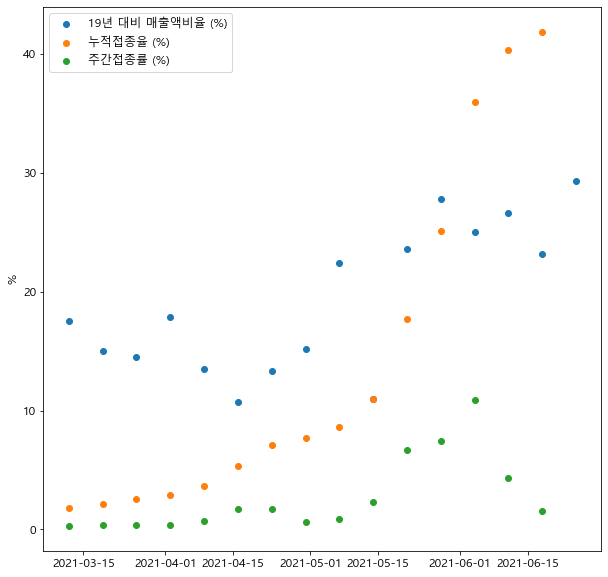

In [115]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.scatter(fin_df['주'], fin_df['매출액']/avg_2019*100 ,label='19년 대비 매출액비율 (%)')
plt.scatter(fin_df['주'], fin_df['누적접종자합계']/3410352*100 ,label='누적접종율 (%)')
plt.scatter(fin_df['주'], fin_df['주간접종자합계']/3410352*100,label='주간접종률 (%)')
plt.ylabel('%')
plt.legend(loc='best')
